In [196]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import re
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D


In [199]:
IBM1 = 'model/IBM1/'
IBM1_init = 'model/IBM1_init/'

IBM1_df = pd.read_csv(os.path.join(IBM1, 'results.csv'), names=('epoch', 'AER', 'Likelihood'))
IBM1_df_init = pd.read_csv(os.path.join(IBM1_init, 'results.csv'), names=('epoch', 'AER', 'Likelihood'))

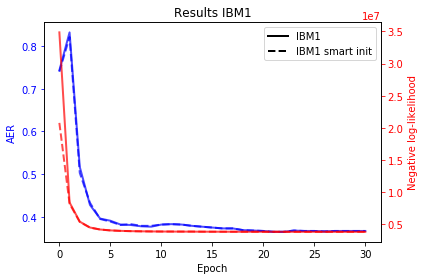

In [209]:
fig, ax1 = plt.subplots()
t = IBM1_df['epoch']
ax1.plot(t, IBM1_df['AER'], 'b-', linewidth=2, alpha=0.7)
ax1.plot(t, IBM1_df_init['AER'], 'b--', linewidth=2, alpha=0.7)
ax1.set_xlabel('Epoch')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('AER', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(t, -IBM1_df['Likelihood'], 'r-', linewidth=2, alpha=0.7)
ax2.plot(t, -IBM1_df_init['Likelihood'], 'r--', linewidth=2, alpha=0.7)
ax2.set_ylabel('Negative log-likelihood', color='r')
ax2.tick_params('y', colors='r')
plt.title('Results IBM1')

legend_elements = [Line2D([0], [0], color='black', lw=2, label='IBM1'),Line2D([0], [0], color='black', lw=2, label='IBM1 smart init', linestyle='--')]
plt.legend(handles=legend_elements)

fig.tight_layout()
plt.savefig(os.path.join(IBM1, 'results_IBM1_.eps'), dpi=300, format='eps')
plt.show()

In [8]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [88]:
IBM2 = 'model/IBM2_IBM1_jump/'
files = os.listdir(IBM2)
files.sort(key=natural_keys)

In [90]:
gammas = []
for file in files:
    if file.split('.')[-1] == 'pickle':
        with open(os.path.join(IBM2, file), "rb") as doc:
            f = pickle.load(doc)
            gam = f['gammas']
            keys = sorted(gam.keys())
            gammas.append([(key, gam[key]) for key in keys])

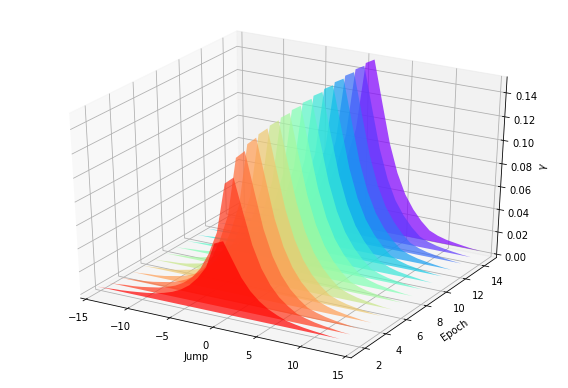

In [175]:
verts = [[(y,z) for y,z in x if abs(y) < 15] for x in gammas]
R = len(gammas[0])

fig = plt.figure(figsize=(8,5.5))
ax = fig.gca(projection='3d')

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(-R,R,1)
zs = list(range(1,len(gammas)+1))

poly = PolyCollection(verts, facecolors=cm.rainbow(np.linspace(1,0,len(gammas))))
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('Jump')
ax.set_xlim3d(-15,15)
ax.set_ylabel('Epoch')
ax.set_ylim3d(1, len(gammas))
ax.set_zlabel(r"$\gamma$")
ax.set_zlim3d(0, 0.15)
fig.tight_layout()
plt.savefig(os.path.join(IBM2, 'gamma.eps'), dpi=300, format='eps')
plt.show()

In [147]:
IBM2_ibm1 = 'model/IBM2_IBM1_jump/'
IBM2_df_ibm1 = pd.read_csv(os.path.join(IBM2_ibm1, 'results.csv'), names=('epoch', 'AER', 'Likelihood'))

IBM2_unif = 'model/IBM2_uniform_jump/'
IBM2_df_unif = pd.read_csv(os.path.join(IBM2_unif, 'results.csv'), names=('epoch', 'AER', 'Likelihood'))

IBM2_rand = 'model/IBM2_random_67_jump/'
IBM2_df_rand = pd.read_csv(os.path.join(IBM2_rand, 'results.csv'), names=('epoch', 'AER', 'Likelihood'))

IBM2_rand1 = 'model/IBM2_random_53_jump/'
IBM2_df_rand1 = pd.read_csv(os.path.join(IBM2_rand1, 'results.csv'), names=('epoch', 'AER', 'Likelihood'))

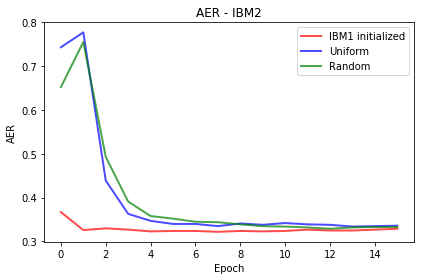

In [170]:
fig = plt.figure()
ax = plt.subplot(111)
t = IBM2_df['epoch']
plt.plot(t, IBM2_df_ibm1['AER'], '-', color='red', linewidth=2, alpha=0.7)
plt.plot(t, IBM2_df_unif['AER'], '-', color='blue', linewidth=2, alpha=0.7)
plt.plot(t, IBM2_df_rand['AER'], '-', color='green', linewidth=2, alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('AER')

plt.title('AER - IBM2')
fig.tight_layout()
ax.legend(('IBM1 initialized','Uniform','Random'))
plt.savefig('results_IBM2_AER.eps', dpi=300, format='eps')
plt.show()

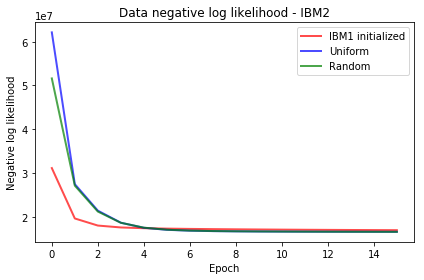

In [169]:
fig = plt.figure()
ax = plt.subplot(111)
t = IBM2_df['epoch']
plt.plot(t, -IBM2_df_ibm1['Likelihood'], '-', color='red', linewidth=2, alpha=0.7)
plt.plot(t, -IBM2_df_unif['Likelihood'], '-', color='blue', linewidth=2, alpha=0.7)
plt.plot(t, -IBM2_df_rand['Likelihood'], '-', color='green', linewidth=2, alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Negative log likelihood')

plt.title('Data negative log likelihood - IBM2')
plt.tight_layout()
ax.legend(('IBM1 initialized','Uniform','Random'))
plt.savefig('results_IBM2_likelihood.eps', dpi=300, format='eps')
plt.show()